In [1]:
import glob
import os 
import shutil 

In [4]:
def moving1(imagee):  #to move to malignant folder 
        
            src_dir = imagee
            dst_dir = "malignant"
            shutil.copy(src_dir,dst_dir)

def moving0(imagee):   #to move to benign folder 
            src_dir = imagee
            dst_dir = "benign"
            shutil.copy(src_dir,dst_dir)

In [5]:
image1 = glob.glob('images/*/1/*.png', recursive=True)  
image0 = glob.glob('images/*/0/*.png', recursive=True) 

In [6]:
for filename in image1:   
       moving1(filename)   #calling the function for malignant


In [7]:
for filename in image0:
    moving0(filename)  #same for benign

In [7]:
import cv2
import matplotlib.pyplot as plt

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
benign_images = os.listdir('benign')[0:2]
#malignant_images_first_folder = f'Major/{first_folder}/1'
malignant_images = os.listdir('malignant')[0:3]

In [20]:
def plot_images(image_index, folder_name, image_name, title):
    sp = figure.add_subplot(2, 3, image_index + 1)
    sp.axis('Off')
    image_path = '{}/{}'.format(folder_name,image_name)
    image_loaded = img=mpimg.imread(image_path)
    sp.set_title(title, fontsize=16)
    plt.imshow(image_loaded, interpolation=None)


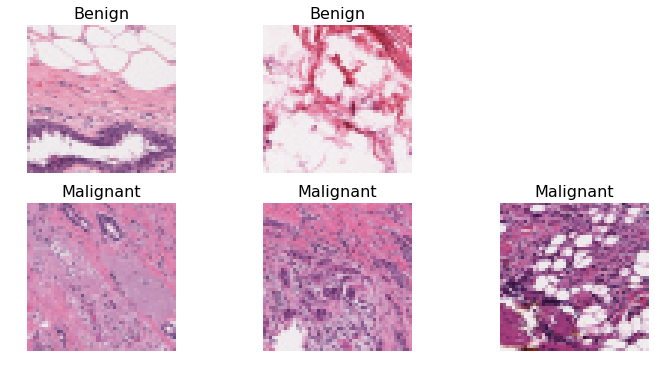

In [21]:
figure = plt.figure(figsize=(12, 6))

for image_index, image_name in enumerate(benign_images):
    plot_images(image_index, 'benign', image_name, "Benign")
for image_index, image_name in enumerate(malignant_images):
    plot_images(image_index + 3, 'malignant', image_name, "Malignant")

In [23]:
benign_images1 = len(os.listdir('benign'))
malignant_images1 = len(os.listdir('malignant'))
total_images =  benign_images1 + malignant_images1

In [24]:
print('Total images',total_images)
print('Benign images',benign_images1)
print('Malignant images',malignant_images1)

Total images 277524
Benign images 198738
Malignant images 78786


### Test

In [46]:
def movingt1(imagee):  #to move to test malignant folder 
        
            src_dir ='malignant/{}'.format(imagee)
            dst_dir = "test_malignant"
            shutil.move(src_dir,dst_dir)

def movingt0(imagee):   #to move to test benign folder 
            src_dir = 'benign/{}'.format(imagee)
            dst_dir = "test_benign"
            shutil.move(src_dir,dst_dir)

In [47]:
image1 = os.listdir('malignant')  
image0 = os.listdir('benign') 

In [48]:
len(image1)

78786

In [49]:
for filename in range(0,20):
    movingt1(image1[filename])

In [50]:
for filename in range(0,20):
    movingt0(image0[filename])

In [51]:
benigntest = len(os.listdir('test_benign'))

In [52]:
print('Benign images',benigntest)

Benign images 21


In [53]:
maligntest = len(os.listdir('test_malignant'))
maligntest

21

In [5]:
benign_images2 = len(os.listdir('benign'))
benign_images2

198718

In [3]:
malign_images2=len(os.listdir('malignant'))
malign_images2

78766

### Move extra benign images

In [13]:
def movingn0(imagee):   #to move to benign folder 
            src_dir = 'main/benign/{}'.format(imagee)
            dst_dir = "new_benign"
            shutil.move(src_dir,dst_dir)

In [14]:
image0=os.listdir('main/benign')[0:119951]

In [15]:
len(image0)

78767

In [16]:
for filename in range(0,1):
    movingn0(image0[filename])  #same for benign

In [17]:
benign_images_new = len(os.listdir('new_benign'))
benign_images_new

1

In [18]:
benign_images3 = len(os.listdir('main/benign'))
benign_images3

78766

### Combining new_benign and benign

In [2]:
import subprocess

## define your paths
path1 = 'new_benign'
path2 = 'benign'

## where to place the merged data
merged_path = 'tot_benign'

## write an rsync commands to merge the directories
rsync_cmd = 'rsync' + ' -avzh ' + path1 + ' ' + path2 + ' ' + merged_path

## run the rsync command
subprocess.run(rsync_cmd, shell=True)

CompletedProcess(args='rsync -avzh new_benign benign tot_benign', returncode=0)

### Moving all new_benign to benign

In [37]:
import subprocess as sbp
import os


fol = os.listdir('/Users/arohinarang/Desktop/Major Project/new_benign')
p2 = ('/Users/arohinarang/Desktop/Major Project/benign')

for i in fol:
    p1 = os.path.join(path,i)
    p3 = 'cp -r ' + p1 +' ' + p2+'/.'
    sbp.Popen(p3,shell=True)

In [38]:
p3

'cp -r /Users/arohinarang/Desktop/Major Project/new_benign/13460_idx5_x1801_y751_class0.png /Users/arohinarang/Desktop/Major Project/benign/.'

In [40]:
benign_images_new = len(os.listdir('benign'))
benign_images_new

198718

### Making folders

In [42]:
def ttv(c,b):
    root_dir = 'main1'
    currentCls = c    #malignant
    src = b + currentCls
    allFileNames = os.listdir(src)    #all files in malignant folder
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, "main1/train"+currentCls)

    for name in val_FileNames:
        shutil.copy(name, "main1/val"+currentCls)

    for name in test_FileNames:
        shutil.copy(name, "main1/test"+currentCls)
    return 0

Don't Run

In [41]:
root_dir='main1'
posCls='/malignant'
negCls='/benign'
os.makedirs(root_dir +'/train' + posCls)
os.makedirs(root_dir +'/train' + negCls)
os.makedirs(root_dir +'/val' + posCls)
os.makedirs(root_dir +'/val' + negCls)
os.makedirs(root_dir +'/test' + posCls)
os.makedirs(root_dir +'/test' + negCls)

In [43]:
ttv(posCls,'main')
ttv(negCls,'main1')

Total images:  78766
Training:  55136
Validation:  11815
Testing:  11815
Total images:  198718
Training:  139102
Validation:  29808
Testing:  29808


0

In [27]:
training_folder_size=194238
validation_folder_size=41623

# Data Preprocessing

In [5]:
import glob
import shutil 

In [6]:
import numpy as np
import cv2
import os

In [3]:
labels = ['benign', 'malignant']
img_size = 50
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_data('/Users/arohinarang/Desktop/Major Project/main1/train')

In [5]:
val = get_data('/Users/arohinarang/Desktop/Major Project/main1/val')

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

### CNN Model

In [7]:
from tensorflow import keras

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
from keras.applications.mobilenet_v2 import preprocess_input

In [10]:
BATCH_SIZE = 128
img_size = 50

In [11]:
train_generator = ImageDataGenerator(
    zoom_range=2,  # set range for random zoom
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,  # randomly flip images
   )

In [34]:
'''
val_generator = ImageDataGenerator(
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,  # randomly flip images
   )

In [12]:
from keras import layers
from keras.applications import DenseNet201
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from keras import backend as K

In [23]:
import json
import math
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import itertools

In [14]:
from keras.layers import Input, Dense,Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

In [15]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler

### Building Model

In [16]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.MaxPool2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model


In [17]:
K.clear_session()
gc.collect()

20

In [18]:
mobnet = MobileNetV2(
    weights='mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5',
    include_top=False,
    input_shape=(50,50,3)
)

model = build_model(mobnet ,lr = 1e-4)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_50 (Functio (None, 2, 2, 1280)        2257984   
_________________________________________________________________
dense (Dense)                (None, 2, 2, 256)         327936    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 256)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 256)         1024      
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [19]:
from sklearn.utils.class_weight import compute_class_weight

In [20]:
y_true = np.concatenate((y_val, y_train))

In [21]:
cw = compute_class_weight('balanced', np.unique(y_true), y_true)
class_weights = {index: weight for index, weight in enumerate(cw)}
class_weights

/Users/arohinarang/testenv/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{0: 0.6981854241903973, 1: 1.7614449373422354}

In [22]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

filepath1="weights.best.h5"
checkpoint = ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [28]:
#train_steps = int(training_folder_size //  BATCH_SIZE)
#val_steps = int(validation_folder_size //  BATCH_SIZE) 

In [24]:
history = model.fit(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=20,
    class_weight=class_weights,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)


Epoch 1/20
1518/1517 [==============================] - ETA: 0s - loss: 0.4847 - accuracy: 0.7673
Epoch 00001: val_accuracy improved from -inf to 0.75691, saving model to weights.best.hdf5
1518/1517 [==============================] - 2364s 2s/step - loss: 0.4847 - accuracy: 0.7673 - val_loss: 0.6519 - val_accuracy: 0.7569
Epoch 2/20
1518/1517 [==============================] - ETA: 0s - loss: 0.4062 - accuracy: 0.8225
Epoch 00002: val_accuracy improved from 0.75691 to 0.84621, saving model to weights.best.hdf5
1518/1517 [==============================] - 2341s 2s/step - loss: 0.4062 - accuracy: 0.8225 - val_loss: 0.4141 - val_accuracy: 0.8462
Epoch 3/20
1518/1517 [==============================] - ETA: 0s - loss: 0.3809 - accuracy: 0.8334
Epoch 00003: val_accuracy improved from 0.84621 to 0.86265, saving model to weights.best.hdf5
1518/1517 [==============================] - 2285s 2s/step - loss: 0.3809 - accuracy: 0.8334 - val_loss: 0.3662 - val_accuracy: 0.8626
Epoch 4/20
1518/1517 [

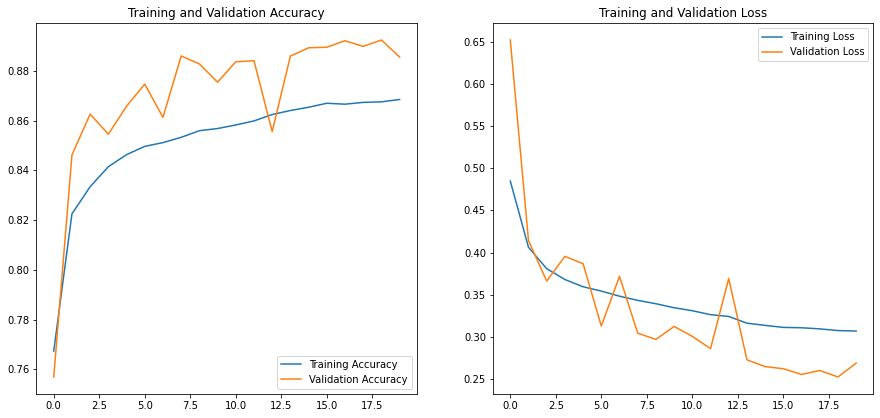

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
test=get_data('/Users/arohinarang/Desktop/Major Project/main1/test')

In [8]:
x_test = []
y_test = []
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Normalize the data
x_test = np.array(x_test) / 255

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


In [9]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.96      0.88      0.92     29808
Malignant (Class 1)       0.75      0.90      0.82     11815

           accuracy                           0.88     41623
          macro avg       0.85      0.89      0.87     41623
       weighted avg       0.90      0.88      0.89     41623



In [12]:
cm=confusion_matrix(y_test, predictions)

In [13]:
cm

array([[26207,  3601],
       [ 1198, 10617]])

In [16]:
sensitivity=cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(f'sensitivity: {sensitivity}')

specificity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print(f'specificity: {specificity}')

sensitivity: 0.8791935050993022
specificity: 0.8986034701650444


### Save Model 

In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("weights.best.hdf5")
print("Saved model to disk")

Saved model to disk


In [24]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("weights.best.hdf5")
print("Saved model to disk")

Saved model to disk


### Extra

In [1]:
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from keras.models import model_from_json
import numpy as np
image = Image.open(r"9344_idx5_x1801_y851_class1.png")
if image.mode != "RGB":
    image = image.convert("RGB")
image = image.resize((50, 50))
image = img_to_array(image)
image = preprocess_input(image)
image = np.expand_dims(image, axis=0)
json_file = open(r"model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(r"weights.best.h5")
y_pred=model.predict_classes(image)[0]
y_pred1=model.predict(image)
y_pred2=model.predict_proba(image)
print(y_pred,y_pred1,y_pred2)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
[1] [[0.8462235]] [[0.8462235]]


In [29]:
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from keras.models import model_from_json
import numpy as np
image = Image.open(r"10301_idx5_x1551_y1701_class0.png")
if image.mode != "RGB":
    image = image.convert("RGB")
image = image.resize((50, 50))
image = img_to_array(image)
image = preprocess_input(image)
image = np.expand_dims(image, axis=0)
json_file = open(r"model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(r"weights.best.h5")
y_pred=model.predict_classes(image)[0]
y_pred[0]


0

In [26]:
#import pickle
#pickle_out=open('Breast_Cancer_Detect.pkl','wb')
#pickle.dump(model_json,pickle_out)
#pickle_out.close()